# Lab: GPA

In this lab, you will explore Wade's famous GPA dataset and find out about the easiest, hardest, and most popular courses at Illinois!

The dataset you are using is this lab is actually the same dataset that Prof Wade used to make the GPA visualizations :) Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)

## Group

Edit the next Python cell to add information about who you're working within your lab section:

In [3]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Heman"
ca1_name = "Justin"
ca2_name = "Jessica"


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = "Jai Rajpal"
partner1_netid = "jrajpal2"
partner1_major = "Information Sciences"

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

## Table of Contents <a id='toc'></a>

**Use the Outline view (View > Command Palette > Type "outline") for navigation.**

* Puzzle 1
    * Puzzle 1.1
    * Puzzle 1.2
* Puzzle 2
    * Puzzle 2.1
    * Puzzle 2.2
    * Puzzle 2.3 
    * Puzzle 2.4
* Puzzle 3
    * Puzzle 3.1
    * Puzzle 3.2
    * Puzzle 3.3
    * Puzzle 3.4
    * Puzzle 3.5

## Puzzle 1: Basic Data Manipulation

### Puzzle 1.1: Loading the Dataset

For the first part of our lab, we'll be using the GPA dataset, which should be automatically downloaded when you fetch this notebook. 

In the following cell, load the pandas library and read the dataset into `df`.

In [4]:
#import the gpa.csv dataset below
import pandas as pd
df = pd.read_csv("gpa.csv")

### Puzzle 1.2: Adding Helper Columns

Add two new columns, `"Total Students"` and `"Average GPA"`, that compute the total number of students in each course and the average GPA for each course, respectively.

You should not include students with a `"W"` in either column. The grade point scale can be found at https://registrar.illinois.edu/courses-grades/explanation-of-grades/.

Hint (double-click this cell to see it): <span style="color:#ffffff00">it is not necessary but you can try the dot() function; see https://stackoverflow.com/questions/18419962/how-to-compute-weighted-sum-of-all-elements-in-a-row-in-pandas for some examples.</span>

In [5]:
weight = [4, 4, 3.67, 3.33, 3, 2.67, 2.33, 2, 1.67, 1.33, 1, 0.67, 0]
grade = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]
df["Total Students"] = df[grade].sum(axis=1)
df["Average GPA"] =  df[grade].dot(weight)/df["Total Students"]

In [6]:
df

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
0,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,12,12,1,0,...,1,0,0,0,0,1,0,"Boonsripaisal, Simon",30,3.678000
1,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,5,12,4,1,...,0,0,0,0,0,1,0,"Boonsripaisal, Simon",30,3.511333
2,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,0,8,7,3,...,0,2,0,0,0,0,0,"Uhall, Michael B",31,3.280323
3,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,8,6,2,0,...,2,1,0,0,0,0,0,"Uhall, Michael B",25,3.440400
4,2020,Spring,2020-sp,AAS,100,Intro Asian American Studies,5,4,3,1,...,2,1,1,0,1,1,0,"Kang, Yoonjung",25,3.000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53928,2010,Summer,2010-su,STAT,410,Statistics and Probability II,5,10,2,2,...,1,3,0,0,0,2,1,"Stepanov, Alexei G",31,3.183226
53929,2010,Summer,2010-su,STAT,440,Statistical Data Management,4,12,8,1,...,0,0,0,0,0,0,0,"Unger, David",28,3.774643
53930,2010,Summer,2010-su,TAM,212,Introductory Dynamics,0,1,3,2,...,1,1,0,2,0,1,0,"Morgan, William T",28,2.595714
53931,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,1,2,2,1,...,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21,2.603333


In [7]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(df[
  (df["YearTerm"] == "2010-su") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 410) \
]["Total Students"].sum() == 31), "It appears that your \"Total Students\" column is incorrect."
assert(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "CS") & \
  (df["Number"] == 225) \
]["Total Students"].sum() == 697), "It appears that your \"Total Students\" column is incorrect."
assert( abs(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 100) \
]["Average GPA"].mean() - 3.247) < 0.01), "It appears that your \"Average GPA\" column is incorrect."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2: Finding the Easiest and Hardest Courses

### Puzzle 2.1: Hardest Courses in the Dataset

Based on the `"Average GPA"` column, find the **30 hardest courses** at Illinois, i.e., the 30 courses with the lowest "Average GPA". Store the results in `df_hard`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nsmallest() function</span>

In [5]:
df_hard = df.nsmallest(30, "Average GPA")
df_hard

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
9089,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,0,0,1,2,...,1,2,1,1,0,15,0,"Taylor, Don",28,1.142857
21561,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,0,1,0,1,...,4,1,1,1,1,10,0,"Hawking, Carol J",24,1.319583
29374,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,0,4,0,1,...,4,1,0,1,0,15,1,"Hershfield, David",30,1.400000
31642,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,0,1,3,0,...,3,0,0,0,2,11,0,"Cohen, Margaret L",25,1.427600
34439,2013,Fall,2013-fa,MATH,2,Introductory Algebra,0,0,0,0,...,10,5,3,3,2,5,3,"Aydin-Mullen, Yelda",31,1.430645
31717,2014,Spring,2014-sp,MATH,220,Calculus,0,3,0,0,...,5,0,2,1,0,11,1,"Gilbert, Rebekah A",28,1.476071
6361,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,0,2,1,2,...,0,0,0,2,1,9,0,"Cohen, Margaret L",21,1.491905
19289,2016,Fall,2016-fa,LER,120,Contemporary Labor Problems,0,2,2,1,...,0,1,2,1,2,8,2,"Hershfield, David",22,1.515455
19557,2016,Fall,2016-fa,MCB,245,Human Anat & Physiol Lab I,0,0,0,0,...,3,4,1,2,0,6,1,"Swigart, James P",23,1.522174
29421,2014,Fall,2014-fa,LLS,296,Bilingual US Latina/o Culture,3,1,0,1,...,1,1,1,0,2,11,1,"Romero, Rolando J",27,1.568519


### Puzzle 2.2: "Level" of Hardest Courses

Find the average `"Number"` of the **30 hardest courses** at Illinois. Store the result as `df_hard_avg`.

In [44]:
df_hard_avg = df_hard["Number"].mean()
df_hard_avg

166.26666666666668

In [9]:
## == TEST CASES for Puzzle 2.1 and 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
import math
assert( math.isclose(df_hard_avg, 4988/30) ), "It appears that your average \"Number\" is incorrect. Please check both Puzzle 2.1 and Puzzle 2.2."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3: ❓ Individual Reflection Question ❓ Are the Hardest Courses Really "Hard"?

After solving Puzzle 2.1 and 2.2, Joe has the following claim:

"We know that the undergraduate courses are coded from 1 to 499, where a larger number (in the hundreds place) usually implies more advanced materials. Based on Puzzle 2.2, the results in Puzzle 2.1 clearly do not represent the hardest courses at Illinois."

Comment on Joe's claim below.

***Double click this cell and type your answer here.***
Joe's is correct in saying that a larger number implies more advanced material however the gpa distrubution does not show that for a reason. 100 level courses tend to have lower gpas than more advanced coursework in a subject because of the students taking the class. The students taking the introductory courses typically are not invested or interested in the coursework and may be taking the course to fufill a university gen ed. Thus their grades would relect this effort and interest. Furthermore, the students taking these introductory courses may not be the best at these subject areas so a lower gpa would also reflect this.

### Puzzle 2.4: Easiest Courses in 2020

Based on the `"Average GPA"` column, find the **30 easiest courses in 2020** at Illinois. Store the results in `df_easy_2020`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nlargest() function</span>

In [6]:
df_easy= df[df.Year==2020]
df_easy_2020 = df_easy.nlargest(30, "Average GPA")
df_easy_2020

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
240,2020,Spring,2020-sp,ANSC,103,Working With Farm Animals,0,73,0,0,...,0,0,0,0,0,0,0,"Emmert, Jason L",74,3.986486
2196,2020,Summer,2020-su,EPSY,408,Learning & Hum Dev w/ EdTech,79,31,3,1,...,0,0,0,0,0,0,2,"Cope, William",114,3.985439
106,2020,Spring,2020-sp,ACCY,504,Auditing,1,36,0,1,...,0,0,0,0,0,0,0,"Chatterton, Angel",38,3.982368
740,2020,Spring,2020-sp,CS,199,Python for Data,4,26,0,1,...,0,0,0,0,0,0,0,"Silva, Mariana T",31,3.978387
2262,2020,Summer,2020-su,MUS,444,Healthy Music Practices,0,29,0,1,...,0,0,0,0,0,0,0,"Sweet, Bridget M",30,3.977667
375,2020,Spring,2020-sp,BADM,352,Database Design and Management,1,42,0,0,...,0,0,0,0,0,0,0,"Pamuksuz, Utku",44,3.977273
195,2020,Spring,2020-sp,ADV,350,Writing for Public Relations,18,10,0,1,...,0,0,0,0,0,0,0,"Peacock, Marisa C",29,3.976897
810,2020,Spring,2020-sp,ECE,206,Electrical & Electronics Lab,9,19,0,1,...,0,0,0,0,0,0,0,"Radhakrishnan, Chandrasek",29,3.976897
2084,2020,Spring,2020-sp,UP,201,Planning in Action,0,41,0,0,...,0,0,0,0,0,0,0,"Edwards, Mary M",42,3.976190
613,2020,Spring,2020-sp,CI,473,Disciplinary Literacy,0,79,0,0,...,1,0,0,0,0,0,0,"Filkins, Scott R",80,3.975000


In [7]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
import math
assert( len(df_easy_2020) == 30 ), "You should only have the 30 easiest courses in 2020."
assert( math.isclose(df_easy_2020["Average GPA"].mean(), 3.9730388348773817) ), "Are you sure you have the 30 easiest courses in 2020?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3: Finding Data by Subject

### Puzzle 3.1: Total Number of Grades by Subject

Find the total number of each grade (eg: "A+"s, "A"s, "A-"s, etc.) given by different subjects. Store the results in `df_group`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the groupby() and agg() function</span>

In [8]:
df_group = df.groupby("Subject").agg('sum').reset_index()
df_group

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA
0,AAS,360617,23290,771,2094,812,517,526,246,135,140,54,29,29,19,76,24,5448,627.599322
1,ABE,265957,44357,315,2556,800,703,902,240,127,175,46,16,43,6,51,14,5980,460.313666
2,ACCY,4553856,829676,7416,23142,15600,14839,13614,5703,2798,2155,1056,253,662,162,513,255,87913,7645.431230
3,ACE,1777080,241702,3523,13421,5040,4316,6859,2610,1627,2282,770,359,623,214,557,103,42201,2908.949399
4,ACES,286071,16537,889,1838,259,119,272,68,67,79,24,16,26,10,68,6,3735,522.491112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,UP,578226,104655,1063,3559,2037,1241,1358,487,248,293,121,39,74,41,147,39,10708,1001.955127
159,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
160,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232
161,VM,187402,56460,0,1825,8,0,5861,1,0,3405,0,0,325,0,8,10,11433,263.747696


In [13]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
assert( len(df_group) == 163 ), "Are you sure you grouped by subjects?"
assert( df_group[ df_group["Subject"] == "CS" ]["A"].values[0] == 45290 ), "Are you sure you counted the right number of each subject?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.2: Average GPA by Subject

In `df_group`, add a new column called `"Overall Average GPA"` that computes the overall GPA of each subject at Illinois.

In [15]:
df_group["Overall Average GPA"] = df_group[grade].dot(weight)/ df_group["Total Students"]
df_group

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA,Overall Average GPA
0,AAS,360617,23290,771,2094,812,517,526,246,135,140,54,29,29,19,76,24,5448,627.599322,3.517162
1,ABE,265957,44357,315,2556,800,703,902,240,127,175,46,16,43,6,51,14,5980,460.313666,3.494786
2,ACCY,4553856,829676,7416,23142,15600,14839,13614,5703,2798,2155,1056,253,662,162,513,255,87913,7645.431230,3.397299
3,ACE,1777080,241702,3523,13421,5040,4316,6859,2610,1627,2282,770,359,623,214,557,103,42201,2908.949399,3.295548
4,ACES,286071,16537,889,1838,259,119,272,68,67,79,24,16,26,10,68,6,3735,522.491112,3.657438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,UP,578226,104655,1063,3559,2037,1241,1358,487,248,293,121,39,74,41,147,39,10708,1001.955127,3.454414
159,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534,3.448760
160,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232,3.384962
161,VM,187402,56460,0,1825,8,0,5861,1,0,3405,0,0,325,0,8,10,11433,263.747696,2.803291


In [25]:
easiest_major= df_group.nlargest(10, "Overall Average GPA")
easiest_major

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA,Overall Average GPA
35,CB,4022,1250,0,140,0,0,17,0,0,1,0,0,0,0,0,2,158,7.767925,3.879747
61,EPOL,18169,4885,16,284,36,8,6,4,0,1,2,0,0,0,3,0,360,34.866105,3.868833
41,CHP,16140,1592,42,131,28,8,7,1,0,3,0,0,0,0,1,0,221,30.783745,3.850995
157,UKR,8048,452,5,190,43,20,8,4,0,1,0,0,0,0,0,0,271,15.181337,3.841661
34,BUS,582306,33256,818,5317,1104,491,274,93,34,41,9,4,10,4,26,11,8225,1105.647911,3.828726
130,REES,6047,603,32,34,7,2,5,2,0,0,0,0,1,0,0,0,83,11.434037,3.827590
54,EDUC,163406,14416,459,2107,316,160,129,35,23,35,7,2,12,2,13,6,3300,305.457539,3.814621
60,EOL,102770,27489,89,1147,231,114,93,10,3,9,0,0,5,0,8,3,1709,193.522492,3.807537
128,PSM,18145,4514,130,46,15,4,12,4,2,3,2,0,0,0,1,0,219,34.219398,3.803881
90,IS,1015522,262508,1858,7984,2297,906,626,193,55,70,21,5,23,1,40,15,14079,1915.785915,3.802956


In [26]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
import math
assert( math.isclose(df_group[df_group["Subject"] == "CS"]["Overall Average GPA"].values[0], 3.2788726192300266) ), "Your overall average GPA does not appear to be correct."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 3.3: Visualizing the Grades of Subject Equal to `"STAT"`

Plot a density histogram of the grades (`"A+"` to `"F"`) for the subject `"STAT"`.

Hint (double-click this cell to see it): 
<span style="color:#ffffff00">
    First, extract the row where the subject is "STAT".
    Then, extract the columns "A+" to "F" and divide them by the total number of students.
    Finally, use plot.bar().
</span>

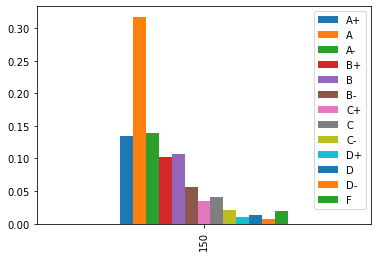

In [33]:
df2= df_group[df_group["Subject"]=="STAT"]
df2= df2[grade]/df2["Total Students"].values[0]
df2.plot.bar()


### Puzzle 3.4: ❓ Individual Reflection Question ❓ 

Density Histogram vs. Frequency Histogram

Why should we use density histogram in Puzzle 3.3? Is it meaningful to compare the frequency histogram between different subjects?

***Double click this cell and type your answer here.***
We should use a density histogram in Puzzle 3.3 to remove the potentential differences in total number of grades per subject. By using a density histogram you can more accurately compare subjects and their grades distrubtions since each subject will have histogram areas that sum to 1. A density histogram will the show a certain letter grade and the percent of students who received that letter grade. Thus comparing density histograms between subjects will be more effective and meaningful. 

### Puzzle 3.5: Find Your Major

Finally, find your major/subject in the dataset and check out how hard it is! 

Feel free to look around and explore! Part of being a data scientist is being creative and using Python to answer questions that you have.  Write your code below and write comments in Puzzle 3.6 to explain what your code does. For example, what are the hardest classes in your major that have had at least 50 students?

In [10]:
# Feel free to explore. Credit will be given as long as you try some new code (i.e., not directly copied from any puzzles).

df3= df[(df.Subject=="BADM") & (df["Total Students"]>=20) & (df["Year"]>=2019)]
df3

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
332,2020,Spring,2020-sp,BADM,199,Business Honors Ind Study,0,21,2,1,...,0,0,0,0,0,0,0,"Metzger, Robert L",25,3.906800
333,2020,Spring,2020-sp,BADM,210,Business Analytics I,2,85,33,19,...,14,4,0,0,0,5,0,"Larson, Eric",208,3.343365
334,2020,Spring,2020-sp,BADM,211,Business Analytics II,3,27,4,5,...,0,0,0,0,0,0,0,"Ahsen, Mehmet E",45,3.726000
335,2020,Spring,2020-sp,BADM,211,Business Analytics II,3,32,4,2,...,0,0,0,0,0,0,0,"Ahsen, Mehmet E",45,3.822444
336,2020,Spring,2020-sp,BADM,211,Business Analytics II,0,13,4,1,...,1,1,0,0,0,0,0,"Ahsen, Mehmet E",26,3.500385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,2019,Winter,2019-wi,BADM,300,The Legal Environment of Bus,8,22,15,6,...,4,2,0,0,0,0,1,"Fricke, Michael R",66,3.530909
7345,2019,Winter,2019-wi,BADM,310,Mgmt and Organizational Beh,0,64,6,1,...,1,1,0,0,0,2,0,"Gill, Shahbaz",78,3.760897
7346,2019,Winter,2019-wi,BADM,320,Principles of Marketing,0,45,2,3,...,0,0,0,1,0,4,0,"Gill, Shahbaz",59,3.547966
7347,2019,Winter,2019-wi,BADM,350,IT for Networked Organizations,1,17,5,3,...,2,0,0,0,0,0,0,"Sachdev, Vishal",29,3.701379


In [11]:
df_hardest_classes_in_major= df3.nsmallest(10, "Average GPA")
df_hardest_classes_in_major

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
5301,2019,Spring,2019-sp,BADM,350,IT for Networked Organizations,0,0,1,3,...,8,4,0,4,0,0,0,"Parthasarathy, Rangarajan",36,2.343056
7177,2019,Summer,2019-su,BADM,375,Operations Management,0,6,2,4,...,1,1,2,5,0,4,1,"Scott, Nehemiah",35,2.400000
2127,2020,Summer,2020-su,BADM,375,Operations Management,0,3,7,3,...,1,1,1,1,4,2,1,"Scott, Nehemiah",34,2.579706
5302,2019,Spring,2019-sp,BADM,350,IT for Networked Organizations,0,0,1,2,...,2,0,0,2,0,0,0,"Parthasarathy, Rangarajan",24,2.624583
373,2020,Spring,2020-sp,BADM,350,IT for Networked Organizations,0,0,2,3,...,3,0,0,2,0,0,0,"Parthasarathy, Rangarajan",23,2.667391
5303,2019,Spring,2019-sp,BADM,350,IT for Networked Organizations,0,2,2,3,...,1,1,0,1,0,0,0,"Parthasarathy, Rangarajan",33,2.889697
2773,2019,Fall,2019-fa,BADM,350,IT for Networked Organizations,0,8,10,13,...,3,1,0,5,0,1,0,"Parthasarathy, Rangarajan",55,2.981818
5358,2019,Spring,2019-sp,BADM,590,Predictive Data Analytics,0,15,6,8,...,0,1,10,2,0,0,0,"Ye, Han",43,2.983721
2827,2019,Fall,2019-fa,BADM,554,Enterprise Database Management,0,3,6,10,...,1,0,3,0,0,0,0,"Sachdev, Vishal",44,2.991591
386,2020,Spring,2020-sp,BADM,378,Logistics Management,0,6,5,1,...,0,1,0,0,0,1,0,"Scott, Nehemiah",24,3.098333


### Puzzle 3.6: ❓ Individual Reflection Question ❓ 

Explain what you did in Puzzle 3.5 here, as well as what you found!  This is your chance to interpret your results and teach us something that you found interesting :)

I found the ten hardest couses by GPA within the Business Adminstration department after 2019. I first created a dataframe of only BADM courses after 2019 with at least 20 students. I then used the nlargest method to find the ten hardest courses by GPA. I found that the hardest BADM courses by GPA after 2019 have been BADM 350, 375, 590,554, and 378.

***Double click this cell and type your answer here.***

# Finale!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!